# Loan approval

Dataset: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Tasks:
1. Exploration analysis
2. Data preprocessing
3. Machine learning model selection
4. Explanation of selected machine learning model
5. Selected model training on preprocessed dataset
6. Model evaluation
7. Conclusion

## 1. Exploration analysis
At first basic libraries such as pandas, numpy, seaborn and sklearn were imported.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
y_n_colors = {'N':'#C03028', 'Y':'#78C850'} # Red, Green

Then downloaded dataset was loaded. Afterwards, we found out shape of our data/matrix and some items from the top.

In [2]:
loan_approval_analysis = pd.read_csv("loan_approval_train.csv")

In [3]:
loan_approval_analysis.shape

(614, 13)

In [4]:
loan_approval_analysis.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


We found out that there are some object attributes so we transformed them into category ones.
* Loan_ID - this attribute is string id of loan, which is not relevant for machine learning
* Gender - categorical attribute which has domain of Male, Female and Nan
* Married - categorical attribute which has domain of Yes, No and Nan
* Dependents - categorical attribute which has domain of 0, 1, 2, 3+ and Nan
* Education - categorical attribute which has domain of Graduate and Not Graduate
* Self_Employed - categorical attribute which has domain of Yes, No and Nan
* ApplicantIncome - income of loan applicant
* CoapplicantIncome - income of loan coapplicant
* LoanAmount - amount applicant/s want to loan
* LoanAmountTerm
* Credit_History - categorical attribute which has domain of 0.0, 1.0 and Nan
* Property_Area - categorical attribute which has domain of Urban, Semiurban and Rural
* Loan_Status - label whether the applicant/s received the loan

In [5]:
def objects_to_categories(df):
    for col in df:
        if (col != 'Loan_ID' and df[col].dtype == 'object'):
            df[col] = df[col].astype('category')

In [6]:
objects_to_categories(loan_approval_analysis)
loan_approval_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 33.9+ KB


In [7]:
loan_approval_analysis.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

After attribute statistics we encoded our categorical values and then started performing some analysis using plots.

At first we used heat map which is good plot to start analysis, because correlation of all attributes can be easily seen. Practically, for us the only relevant row is Loan_Status_Coded because it shows correlation of all attributes with label attribute.

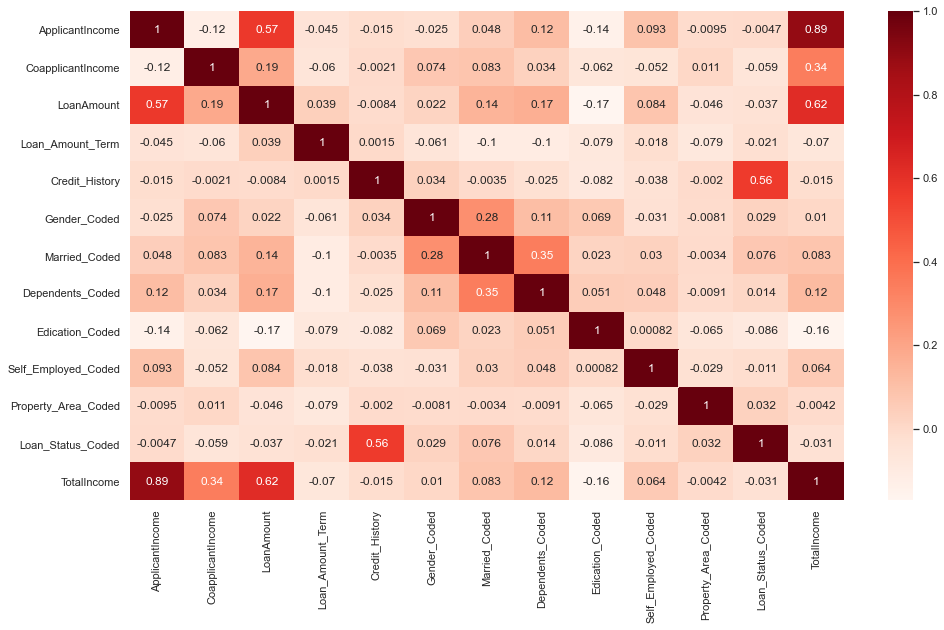

In [8]:
loan_approval_analysis['Gender_Coded'] = loan_approval_analysis.Gender.cat.codes
loan_approval_analysis['Married_Coded'] = loan_approval_analysis.Married.cat.codes
loan_approval_analysis['Dependents_Coded'] = loan_approval_analysis.Dependents.cat.codes
loan_approval_analysis['Edication_Coded'] = loan_approval_analysis.Education.cat.codes
loan_approval_analysis['Self_Employed_Coded'] = loan_approval_analysis.Self_Employed.cat.codes
loan_approval_analysis['Property_Area_Coded'] = loan_approval_analysis.Property_Area.cat.codes
loan_approval_analysis['Loan_Status_Coded'] = loan_approval_analysis.Loan_Status.cat.codes
loan_approval_analysis['TotalIncome'] = loan_approval_analysis['ApplicantIncome'] + loan_approval_analysis['CoapplicantIncome']

plt.figure(figsize=(16,9))
sns.heatmap(loan_approval_analysis.corr(method='pearson'), cmap='Reds', annot=True)

After heatmap plot we wanted to explore most interesting numerical attributes such as ApplicantIncome, CoapplicantIncome and LoanAmount. We wanted to see value ranges of these attributes. There are two columns because outliers were so high we could not see averages.

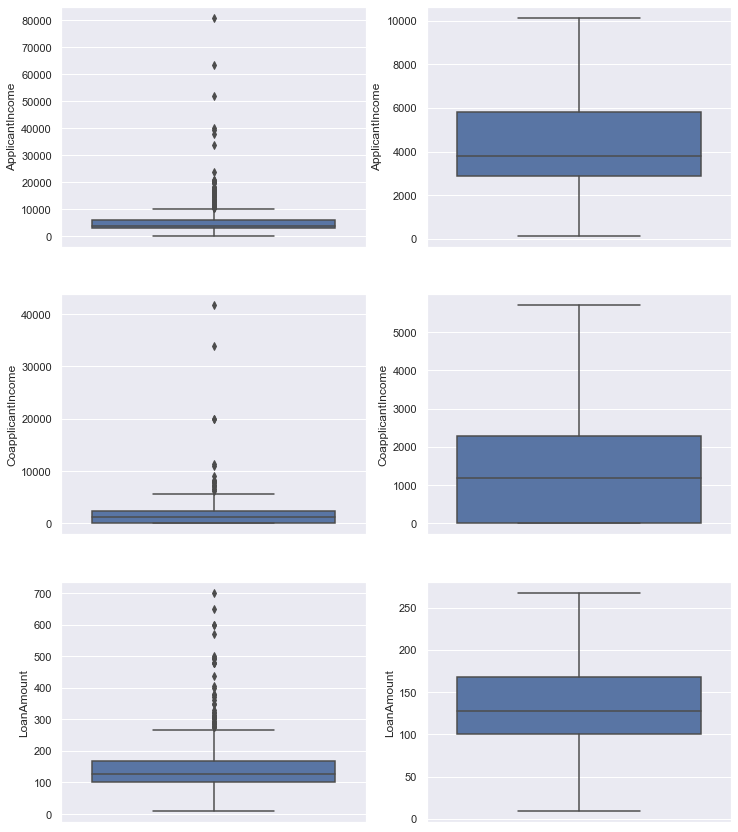

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(12,15))
sns.boxplot(y='ApplicantIncome', data=loan_approval_analysis, showfliers=True, ax=ax[0,0])
sns.boxplot(y='ApplicantIncome', data=loan_approval_analysis, showfliers=False, ax=ax[0,1])
sns.boxplot(y='CoapplicantIncome', data=loan_approval_analysis, showfliers=True, ax=ax[1,0])
sns.boxplot(y='CoapplicantIncome', data=loan_approval_analysis, showfliers=False, ax=ax[1,1])
sns.boxplot(y='LoanAmount', data=loan_approval_analysis, showfliers=True, ax=ax[2,0])
sns.boxplot(y='LoanAmount', data=loan_approval_analysis, showfliers=False, ax=ax[2,1])

After exploring most interesting numerical values with box plots, we wanted to see them combined with some categorical values such as Education, Property_Area or Gender. We used strip plots for this purpose.

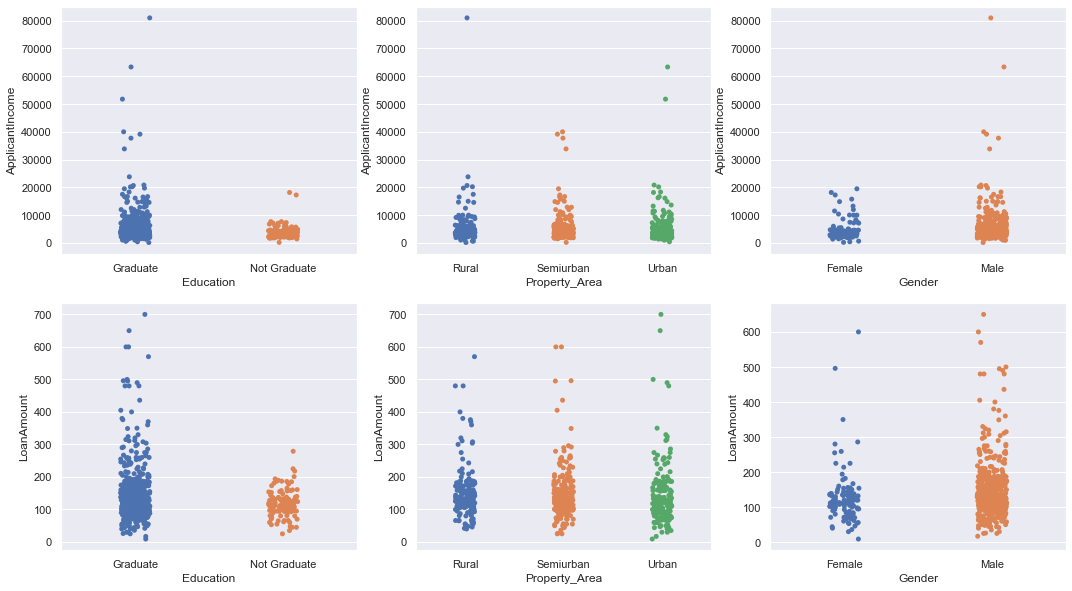

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))
sns.stripplot(x='Education', y='ApplicantIncome', data=loan_approval_analysis, ax=ax[0,0])
sns.stripplot(x='Property_Area', y='ApplicantIncome', data=loan_approval_analysis, ax=ax[0,1])
sns.stripplot(x='Gender', y='ApplicantIncome', data=loan_approval_analysis, ax=ax[0,2])
sns.stripplot(x='Education', y='LoanAmount', data=loan_approval_analysis, ax=ax[1,0])
sns.stripplot(x='Property_Area', y='LoanAmount', data=loan_approval_analysis, ax=ax[1,1])
sns.stripplot(x='Gender', y='LoanAmount', data=loan_approval_analysis, ax=ax[1,2])

After strip plot analysis we finally came to analysis of label data depending on our categorical data. We wanted to see whether there is some interconnection between attributes such as Gender, Married, Dependents... and our label attribute.

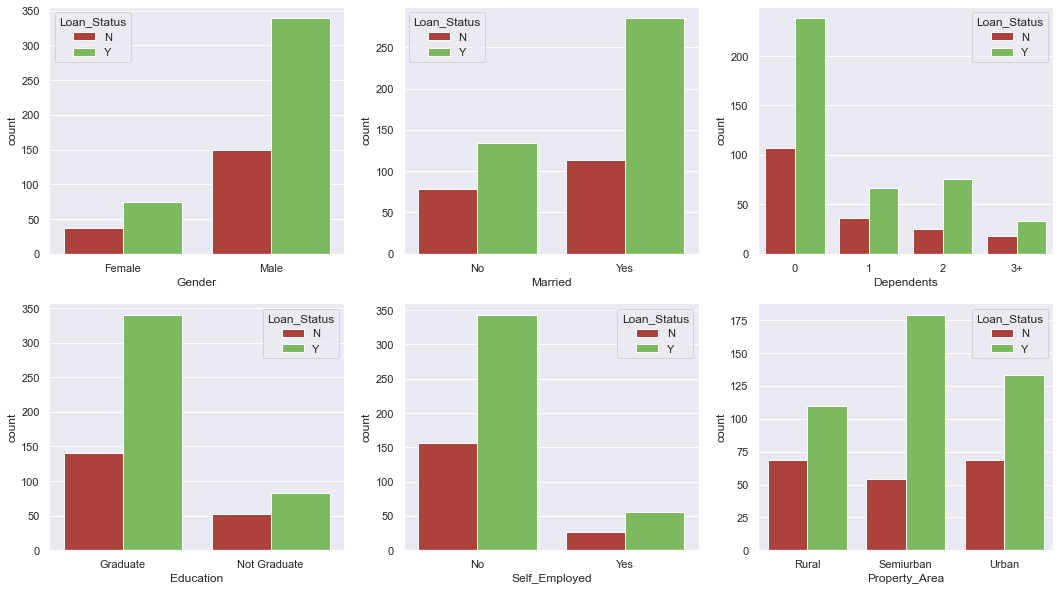

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))
sns.countplot(x='Gender', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[0,0])
sns.countplot(x='Married', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[0,1])
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[0,2])
sns.countplot(x='Education', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[1,0])
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[1,1])
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[1,2])


Our last step of exploration analysis was to determing whether we can find any relation between LoanAmount, TotalIncome and our label attribute. As could be observed in out heatmap, there is meerly any correlation between LoanAmount, TotalIncome and whether those people got loan or not.

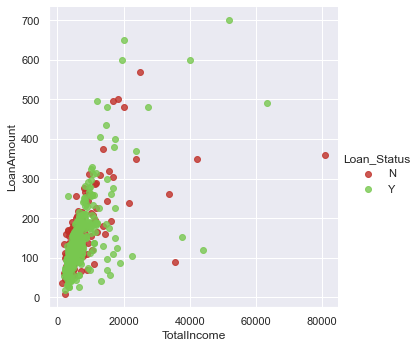

In [12]:
sns.lmplot(x = 'TotalIncome', y = 'LoanAmount', hue = 'Loan_Status', data = loan_approval_analysis, palette = y_n_colors, fit_reg = False)

## 2. Data preprocessing

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC

In [14]:
# Loaded data for training and testing
loan_approval_train = pd.read_csv("loan_approval_train.csv")
loan_approval_test = pd.read_csv("loan_approval_test.csv")

# Feature selection
# Dropping unnecessary column (ID), other columns are relevant
loan_approval_train = loan_approval_train.drop(columns=['Loan_ID'])
loan_approval_test = loan_approval_test.drop(columns=['Loan_ID'])

# Feature extraction
# Only new relevant feature is total income, in case person has coapplicant
loan_approval_train['TotalIncome'] = loan_approval_train['ApplicantIncome'] + loan_approval_train['CoapplicantIncome']

# Transforming object features to categories
objects_to_categories(loan_approval_train)
objects_to_categories(loan_approval_test)

In [15]:
# As we can see our data are a bit unbalanced
# But we can expect that the probability of aquiring loan is higher,
# therefore we know it is not serious problem
loan_approval_train['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
loan_approval_X, loan_approval_y = loan_approval_train.drop(columns=['Loan_Status']), loan_approval_train.Loan_Status
loan_approval_train_X, loan_approval_test_X, loan_approval_train_y, loan_approval_test_y = train_test_split(
    loan_approval_X, loan_approval_y, test_size=0.2, random_state=1
)

loan_approval_test_y.value_counts()

Y    84
N    39
Name: Loan_Status, dtype: int64

In [17]:
num_features = loan_approval_train_X.select_dtypes('number').columns
cat_features = loan_approval_train_X.select_dtypes('category').columns

num_pipeline = make_pipeline(SimpleImputer(strategy='median', fill_value='missing'), RobustScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent', fill_value='missing'), OneHotEncoder(handle_unknown='ignore'))
default_preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, num_features), ('cat', cat_pipeline, cat_features)])

During model training phase, we discovered that feature Credit_History is our superior feature that turns classification into its favor. We tried to remove that feature and try training without it, but our F1 score fell 10 % approx. Therefore we decided to keep that column, also in practice this feature decides most if you get loan or not.

In [18]:
loan_approval_test_X_no_Credit_History = loan_approval_test_X.drop(columns='Credit_History')
loan_approval_train_X_no_Credit_History = loan_approval_train_X.drop(columns='Credit_History')

## 3. Machine learning model selection

### KNN Classifier
### Logistic Regression - Martin Podhora
### Decision Tree Classifier - Michal Mokroš

## 4. Explanation of selected machine learning model

### KNN Classifier

KNN - I use every record as one point in multidimensional space, which has coordinates equal to record attributes. Then, when I am asking, how to classify some unclassified record, I put him into that space and find K nearest recods in that space. Important parameters are K, and way to measure distance between points. 

### Logistic Regression

Logistic regression is mainly used for classification. Its main component is linear combination of features that is transformed using logistic function (sigmoid). Transformed results are in range <0, 1> and states the probablity of classified variable.

$$ P(y=1) = \sigma(X \cdot w) = \frac{1}{1 + e^{-X \cdot w}} $$
* $X$ are input features
* $w$ are coefficients
* $P(y=1)$ is probability that the class label for the given example is 1
<br>
<br>
* The reason for using logistic regression for classification instead of linear regression is that it better performs on datasets with outliers. If we want to draw a line best fitting our data and we have outliers we can remain with model that is highly affected by them. On the other hand if we want to draw a sigmoid we can better deal with these outliers simply because it converges to -1 reaching minus infinity and 1 reaching infinity. Since it performs really well if we are doing this type of binary classification.

### Decision Tree Classifier

Decision Tree is a tree-like model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. A tree is built by splitting the source set, constituting the root node of the tree, into subsets. Most notable decision tree algorithms are ID3, its successor C4.5, and CART.

## 5. Selected model training on preprocessed dataset


### KNN Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_train_x = default_preprocessor.fit_transform(loan_approval_X)
knn_train_y = loan_approval_y.cat.codes

For KNN is very important "select K best", because with more attributes the dimensionality grow and precision decreases. Also, we want to get best N neghtbors possible, beacuse for KNN it is important attribute.

In [20]:
knn_parameter_grid = {
    "kneighborsclassifier__n_neighbors": [5, 9, 11, 15, 21],
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "kneighborsclassifier__p": [1, 2],
    "selectkbest__k": [2, 3, 4, 6, 8, 9, 10, 11, "all"]
}

knn_grid_pipeline = make_pipeline(
    SelectKBest(),
    KNeighborsClassifier()
)

knn_grid_search_cv = GridSearchCV(knn_grid_pipeline, knn_parameter_grid, cv=5, scoring="f1").fit(knn_train_x, knn_train_y)

I have also tried to make my own preprocessing, which made space between attributes depending on information gain (so unimportant attributes have values closer, so they make smaller decision difference), but it did not increase accuracy.

In [21]:
def knn_scale_by_information_gain(train, train_y, test):
    kBest = SelectKBest(k="all").fit(train, train_y)
    print(kBest.scores_)
    for i in range(0, len(kBest.scores_)):
        score = kBest.scores_[i]
        train[i] = train[i]*(score)
        test[i] = test[i]*(score)

In [22]:
knn_best_params = knn_grid_search_cv.best_params_
knn_best_pipeline = make_pipeline(
    SelectKBest(k=knn_best_params["selectkbest__k"]),
    KNeighborsClassifier(p=knn_best_params["kneighborsclassifier__p"],
                         weights=knn_best_params["kneighborsclassifier__weights"], 
                         n_neighbors=knn_best_params["kneighborsclassifier__n_neighbors"]
                        )
)
knn_best_pipeline.fit(knn_train_x, knn_train_y)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=2,
                             score_func=<function f_classif at 0x00000229FD4D2CA8>)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=1,
                                      weights='uniform'))],
         verbose=False)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

#### Hyperparameters

At first we transform the data with our default preprocessor to fill missing values, encode and scale our data.

In [24]:
transformed_X = default_preprocessor.fit_transform(loan_approval_X)
transformed_y = loan_approval_y.cat.codes

Since we have our data prepared we can start with GridSearch. We can look into the documentation of our classifier (in this case LogisticRegression) and look for hyperparameters. Not all of them are needed to adjust.
<br>
Logistic regression has various types of solvers liblinear, saga, newton_cg, lbfgs. These solvers word with different hyperparametes so I decided to split my search for best performing model with particular hyperparameters into 4 steps depending on which solver I use.
<br>
I found very good explanation of all solvers here: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions

First selected solver is liblinear. It’s a linear classification that supports logistic regression. Classifier makes decision based on the value of a linear combinations of the characteristics.  It can do automatic parameter selection and it is good for larga-scale classications with high dimensional dataset.

In [25]:
liblinear_logistic_regression_params = {'penalty':['l2', 'l1'],
         'tol':[1e-3, 1e-4, 1e-5],
         'C': [0.01, 0.1, 1, 10, 100],
         'class_weight':['balanced', None],
         'solver':['liblinear']}

liblinear_logistic_regression_gs = GridSearchCV(
    LogisticRegression(),
    liblinear_logistic_regression_params,
    cv = 5,
    scoring = 'f1',
    n_jobs=-1)
liblinear_result = liblinear_logistic_regression_gs.fit(transformed_X, transformed_y)
print(liblinear_result.best_params_)
print(liblinear_result.best_score_)

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
0.8766952317357394


This solver is a variant of SAG supporting automatic parameter selection. It is also suitable for large datasets and allows multinomial logistic regression. According to the documentation this solver is often the best choice but I do not expect to perform well on this small dataset we have.

In [26]:
saga_logistic_regression_params = {'penalty':['elasticnet'],
         'tol':[1e-2, 1e-3],
         'C': [0.01, 0.1, 1, 10, 100],
         'class_weight':['balanced', None],
         'solver':['saga'],
         'l1_ratio':[0,0.5,1],
         'max_iter':[1000]}

saga_logistic_regression_gs = GridSearchCV(
    LogisticRegression(),
    saga_logistic_regression_params,
    cv = 10,
    scoring = 'f1',
    n_jobs=-1)
saga_result = saga_logistic_regression_gs.fit(transformed_X, transformed_y)
print(saga_result.best_params_)
print(saga_result.best_score_)


{'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 1, 'max_iter': 1000, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.001}
0.8353551466980098


Newton's method uses quadratic function minimisation. It create Hessian matrix n x n. It is computationally expensive because we need to calculate members of Hessian matrix. It supports just l2 penalty.

In [27]:
newton_logistic_regression_params = {'penalty':['l2'],
         'tol':[1e-3, 1e-4, 1e-5],
         'C': [0.01, 0.1, 1, 10, 100],
         'class_weight':['balanced', None],
         'solver':['newton-cg']}

newton_logistic_regression_gs = GridSearchCV(
    LogisticRegression(),
    newton_logistic_regression_params,
    cv = 10,
    scoring = 'f1',
    n_jobs=-1)
newton_result = newton_logistic_regression_gs.fit(transformed_X, transformed_y)
print(newton_result.best_params_)
print(newton_result.best_score_)


{'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
0.8755643250266081


It is analogoue of the Newton's method but it stores less vectors of Hessian matrix so it uses limited memory. It is expected to perform best on small datasets. Biggest drawback of this method is that it might not always converge.

In [28]:
lbfgs_logistic_regression_params = {'penalty':['l2'],
         'tol':[1e-3, 1e-4, 1e-5],
         'C': [0.01, 0.1, 1, 10, 100],
         'class_weight':['balanced', None],
         'solver':['lbfgs'],
         'max_iter':[500]}

lbfgs_logistic_regression_gs = GridSearchCV(
    LogisticRegression(),
    lbfgs_logistic_regression_params,
    cv = 10,
    scoring = 'f1',
    n_jobs=-1)
lbfgs_result = lbfgs_logistic_regression_gs.fit(transformed_X, transformed_y)
print(lbfgs_result.best_params_)
print(lbfgs_result.best_score_)

{'C': 1, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
0.8755643250266081


Now after best parameters search I tried the best performing liblinear which had best f1 score but during f1 test it did not perform best so I tried better according to the documentation. I decided also because these scores do not have high gap between themselves.
<br>
I chose best parameters of lbfgs but I changed class_weight parameter to balanced because we have unbalanced training set.

In [29]:
LogisticRegression_pipeline = make_pipeline(
    default_preprocessor,
    LogisticRegression(
        C=0.1,
        class_weight='balanced',
        penalty='l1',
        solver='liblinear',
        tol=0.001,
        max_iter = 100)
)

lrPipeline_train = LogisticRegression_pipeline.fit(loan_approval_train_X, loan_approval_train_y)
lrPipeline_full = LogisticRegression_pipeline.fit(loan_approval_X, loan_approval_y)

### Decision Tree Classifier

### HyperParameters

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), 'min_samples_leaf':[1, 3, 5, 7, 10], 'max_leaf_nodes': [10, 100, 200, None], 'class_weight': ['balanced'], 'ccp_alpha':[0.0, 0.001, 0.01, 0.1, 0.3]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, cv=10, scoring='f1')

clf_pipeline = make_pipeline(
    default_preprocessor,
    clf
)

result = clf_pipeline.fit(loan_approval_train_X, loan_approval_train_y.cat.codes)
print(result[1].best_params_)
print(result[1].best_score_)

{'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'splitter': 'random'}
0.8777246962078535


After trying various combinations of hyperparameters, it was decided that these were the most influential, and also time relatedly fast to compare with different values. Here were selected the best parameters for the classifier.

### SelectKBest

As can be seen from the result. SelectKBest was not helpful in this situation, because the accuraccies with different number of features used were the same. During testing it also occured that using 'Credit History' column is very important, as this column is strongly correlated with 'Loan Status' class. So after trying different variations of DecisionTreeClassifier's parameter in this for cycle, and also trying it with different number of columns, with or without 'Credit History', it was decided to not use fixed number of features, and to use all of them.

Best score: 0.8048780487804879 for k: 1


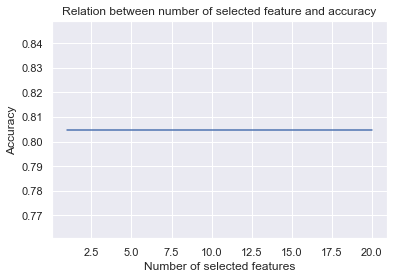

In [31]:
scores = []
ks = list(range(1, 21))

for k in ks:
    dt_select_pipeline = make_pipeline(
        default_preprocessor,
        SelectKBest(k=k),
        DecisionTreeClassifier(
            ccp_alpha=result[1].best_params_['ccp_alpha'],
            class_weight='balanced',
            criterion=result[1].best_params_['criterion'],
            max_leaf_nodes=result[1].best_params_['max_leaf_nodes'],
            min_samples_leaf=result[1].best_params_['min_samples_leaf'],
            splitter=result[1].best_params_['splitter']
        ),
    )

    dt_select_pipeline.fit(loan_approval_train_X, loan_approval_train_y)
    scores.append(dt_select_pipeline.score(loan_approval_test_X, loan_approval_test_y))

print("Best score:", max(scores), "for k:", ks[scores.index(max(scores))])
ax = sns.lineplot(x=ks, y=scores)
ax.set_title("Relation between number of selected feature and accuracy")
ax.set_xlabel("Number of selected features")
ax.set_ylabel("Accuracy")
plt.show()

### Model Training

Here the created DecisionTreeClassifier model can be seen, with parameters decided by GridSearchCV. It is trained on training part of train data acquired.

In [32]:
DecisionTreeClassifier_pipeline = make_pipeline(
    default_preprocessor,
    DecisionTreeClassifier(
            ccp_alpha=result[1].best_params_['ccp_alpha'],
            class_weight=result[1].best_params_['class_weight'],
            criterion=result[1].best_params_['criterion'],
            max_leaf_nodes=result[1].best_params_['max_leaf_nodes'],
            min_samples_leaf=result[1].best_params_['min_samples_leaf'],
            splitter=result[1].best_params_['splitter']
    )
)

dtPipeline_train = DecisionTreeClassifier_pipeline.fit(loan_approval_train_X, loan_approval_train_y)
dtPipeline_full = DecisionTreeClassifier_pipeline.fit(loan_approval_X, loan_approval_y)

## 6. Model evaluation


### Model Classifiers (KNN Classifier, Logistic Regression, Decision Tree Classifier)

In [36]:
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve, mean_squared_error, f1_score, precision_score, recall_score

During this phase we evaluate our model using several (imported) metrics or paradigms.

### Confusion matrices

Here is confusion matrix for Linear regression

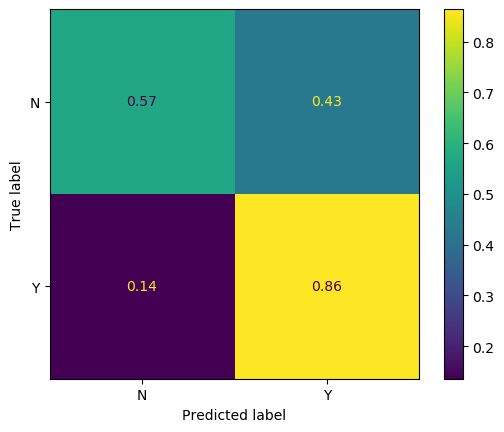

In [92]:
sns.reset_orig()
plot_confusion_matrix(lrPipeline_train, loan_approval_train_X, loan_approval_train_y, normalize="true")

Here is confusion matrix fo Decision tree

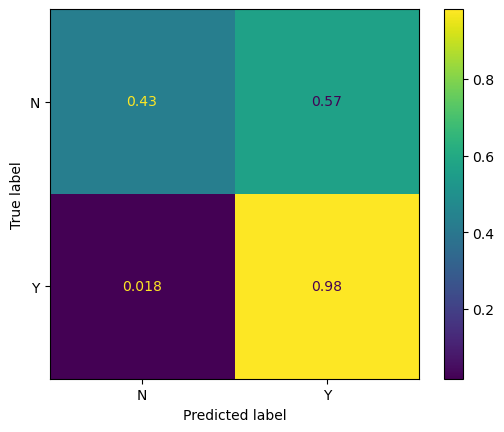

In [38]:
sns.reset_orig()
plot_confusion_matrix(dtPipeline_train, loan_approval_train_X, loan_approval_train_y, normalize="true")

After evaluation of models with confusion matrix it is good to plot ROC curve for better visualization of relation between True positive rate and False positive rate.

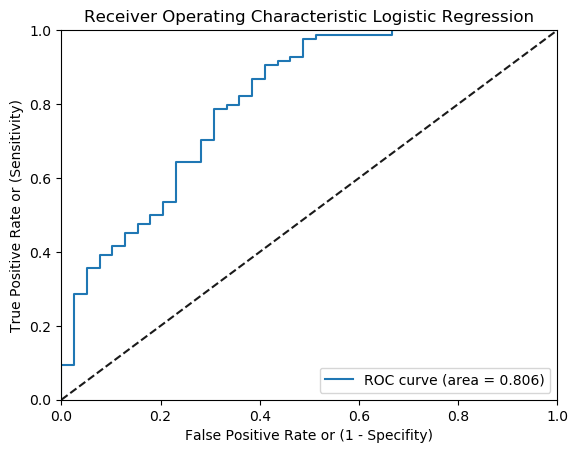

In [94]:
y_true = loan_approval_test_y.cat.codes
y_lr_pred = lrPipeline_train.predict_proba(loan_approval_test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_lr_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic Logistic Regression')
plt.legend(loc="lower right")

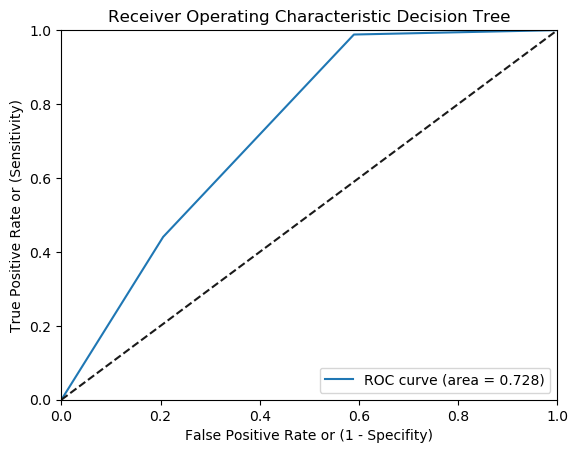

In [96]:
y_true = loan_approval_test_y.cat.codes
y_lr_pred = dtPipeline_train.predict_proba(loan_approval_test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_lr_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic Decision Tree')
plt.legend(loc="lower right")

Last part of our evaluation is by numeric scores using, precision score, recall score, f1 score and mean squared error.

In [41]:
y_true = loan_approval_test_y 

#KNN

#Logistic Regression
y_lr_pred = lrPipeline_train.predict(loan_approval_test_X)

print("\nLogistic Regression")
print("\nPrecision = TP / (TP + FP)")
print(precision_score(y_true, y_lr_pred, average="micro"))  # calculate total TP, FN, FP
print(precision_score(y_true, y_lr_pred, average="macro", zero_division=0))  # calculate metrics for each class individually with same weight

print("\nRecall = TP / (TP + FN)")
print(recall_score(y_true, y_lr_pred, average="micro"))
print(recall_score(y_true, y_lr_pred, average="macro"))

print("\nF1 = 2 * (precision * recall) / (precision + recall)")
print(f1_score(y_true, y_lr_pred, average="micro"))
print(f1_score(y_true, y_lr_pred, average="macro"))

print("\nRMSE")
print(mean_squared_error(y_true.cat.codes, pd.Series(data=y_lr_pred).astype('category').cat.codes))

#Decision Tree Classifier
y_dt_pred = dtPipeline_train.predict(loan_approval_test_X)

print("\nDecision Tree Classifier")
print("\nPrecision = TP / (TP + FP)")
print(precision_score(y_true, y_dt_pred, average="micro"))  # calculate total TP, FN, FP
print(precision_score(y_true, y_dt_pred, average="macro", zero_division=0))  # calculate metrics for each class individually with same weight

print("\nRecall = TP / (TP + FN)")
print(recall_score(y_true, y_dt_pred, average="micro"))
print(recall_score(y_true, y_dt_pred, average="macro"))

print("\nF1 = 2 * (precision * recall) / (precision + recall)")
print(f1_score(y_true, y_dt_pred, average="micro"))
print(f1_score(y_true, y_dt_pred, average="macro"))

print("\nRMSE")
print(mean_squared_error(y_true.cat.codes, pd.Series(data=y_dt_pred).astype('category').cat.codes))


Logistic Regression

Precision = TP / (TP + FP)
0.7804878048780488
0.7774527452745275

Recall = TP / (TP + FN)
0.7804878048780488
0.6881868131868132

F1 = 2 * (precision * recall) / (precision + recall)
0.7804878048780488
0.7057155516171909

RMSE
0.21951219512195122

Decision Tree Classifier

Precision = TP / (TP + FP)
0.8048780487804879
0.8620976692563818

Recall = TP / (TP + FN)
0.8048780487804879
0.6991758241758241

F1 = 2 * (precision * recall) / (precision + recall)
0.8048780487804877
0.7225563909774435

RMSE
0.1951219512195122


### Dummy classifiers

During evaluation we should also compare our models with some baseline models. These models in fact represent some models that try to (randomly) guess labels.

In [33]:
from sklearn.dummy import DummyClassifier

In [34]:
coded_loan_approval_train_y = loan_approval_train_y.cat.codes
coded_loan_approval_test_y = loan_approval_test_y.cat.codes

In [102]:
dummy_uniform = make_pipeline(
    default_preprocessor,
    DummyClassifier(strategy='uniform')
)
dummy_uniform.fit(loan_approval_train_X, coded_loan_approval_train_y)
print("Baseline model using uniform strategy score:", dummy_uniform.score(loan_approval_test_X, coded_loan_approval_test_y))

dummy_stratified = make_pipeline(
    default_preprocessor,
    DummyClassifier(strategy='stratified')
)
dummy_stratified.fit(loan_approval_train_X, coded_loan_approval_train_y)
print("Baseline model using stratified strategy score:", dummy_stratified.score(loan_approval_test_X, coded_loan_approval_test_y))

dummy_most_frequent = make_pipeline(
    default_preprocessor,
    DummyClassifier(strategy='most_frequent')
)
dummy_most_frequent.fit(loan_approval_train_X, coded_loan_approval_train_y)
print("Baseline model using most frequent strategy score:", dummy_most_frequent.score(loan_approval_test_X, coded_loan_approval_test_y))

print("Logistic regression score:", lrPipeline_train.score(loan_approval_test_X, loan_approval_test_y))
print("Decision tree score:", dtPipeline_train.score(loan_approval_test_X, loan_approval_test_y))


Baseline model using uniform strategy score: 0.4634146341463415
Baseline model using stratified strategy score: 0.5853658536585366
Baseline model using most frequent strategy score: 0.6829268292682927
Logistic regression score: 0.7804878048780488
Decision tree score: 0.8048780487804879


As we can see from the resulting scores, our model generally perform better then baseline so we can at least say our are not completely random.

## 7. Conclusion